# Продвинутый Python, лекция 3

## Seaborn

Хорошо, если matplotlib достаточно мощный, чтобы отрисовывать все, что надо, зачем нужны другие бибилотеки?

Ответ простой: хотим еще проще и более красиво. Хотим, скажем просто загрузить датасет и по нему по щелчку пальца получать все нужные и красивые картиночки (без постоянных передач столбцов etc)

Для этого создали надстройку над matplotlib - seaborn. Внутри нее зашит все тот же matplotlib, но только зашит под капотом + добавлено хорощее вазимодействие с pandas (+ еще красиво выглядит)

[Документация](https://seaborn.pydata.org/index.html)

Вернемся к ониме для того, чтобы это все показать и побольше поисследовать

In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: anime.csv               
  inflating: rating.csv              


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("anime.csv").set_index("anime_id")
df.sample(5)

,name,genre,type,episodes,rating,members
anime_id,,,,,,
2685,Tsubasa: Tokyo Revelations,"Action, Adventure, Drama, Fantasy, Romance, Sh...",OVA,3,8.44,57963
20959,Kansen: Ball Buster The Animation,Hentai,OVA,1,6.07,1944
13731,Eureka Seven: New Order,"Adventure, Drama, Mecha, Romance, Sci-Fi",Special,1,6.77,5900
7501,Kintarou Taiiku Nikki,Comedy,Movie,1,4.88,174
8524,The Kabocha Wine: Nita no Aijou Monogatari,"Comedy, Romance, School, Slice of Life",Movie,1,6.77,200


<Figure size 1000x1000 with 0 Axes>

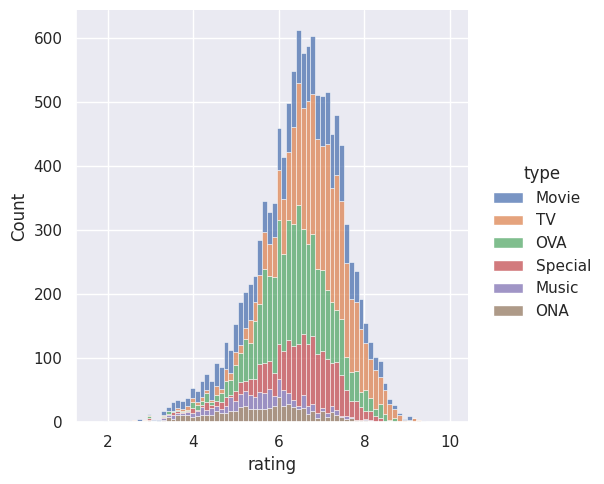

In [ ]:
plt.figure(figsize=(10, 10)) #работает на matplotlib, поэтому все работает, как и там
sns.set_theme() #можно поставить красивые темы, но давайте пока по дефолту (он тоже красивый)
sns.displot(
    data=df,
    x="rating",
    hue="type",
    multiple='stack'
)
plt.show() # Получаем гистограмму!

Бум, получили сразу гистограммы с аггрегацией по типу без ненужных проблем!

(Задание на много минут: постройте то же самое с помощью чистого matplotlib)

Что хорошего в seaborn с точки зрения управления?

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

Внутри seaborn графики разделены на 3 части по типу того, что мы хотим видеть:

* Посмотреть зависимость (replot)

* Посмотреть распределение (distplot)

* Посмотреть что-то в разбитии по категориям (catplot)

За счет выделения по частям мы получаем схожий интерфейс (единственная разница - указать kind)

Ладно, вот у нас есть какие-то данные численные (рейтинг, число эпизодов, мемберы)

Хотим посмотреть на то, а как они там зависят друг от друга. Как это сделать?

Можно было бы просто нарисовать графики в matplotlib, а можем нарисовать jointplot, в котором будут видны не только сами точки, но и распределения

In [4]:
tips = sns.load_dataset("tips") #посмотрим на одном из standalone датасете из seaborn
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


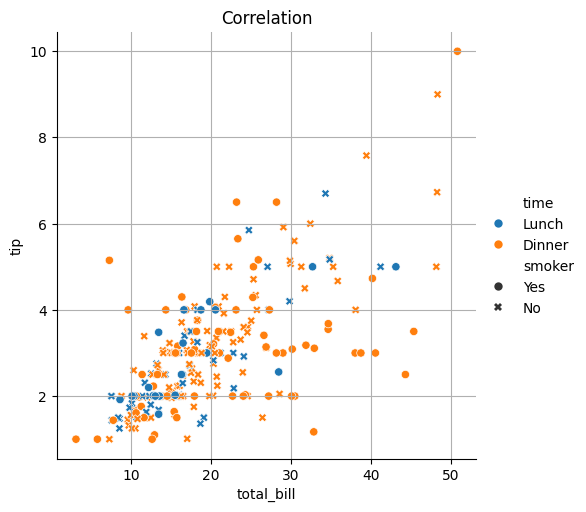

In [6]:
sns.relplot(data=tips, x="total_bill", y="tip", hue='time', style='smoker')
#hue - параметр, по которому разбиваем по типу
#style - нарисовать разными точками по типу
#еще есть size - по размерам
plt.grid()
plt.title("Correlation")
plt.show()

А если у нас, например, есть дата, где может быть много одинаковых значений x, но разные значения y?

Если попробовать просто нарисовать линию, то будет плохо. Хотим линию с некоторым доверительным интервалом

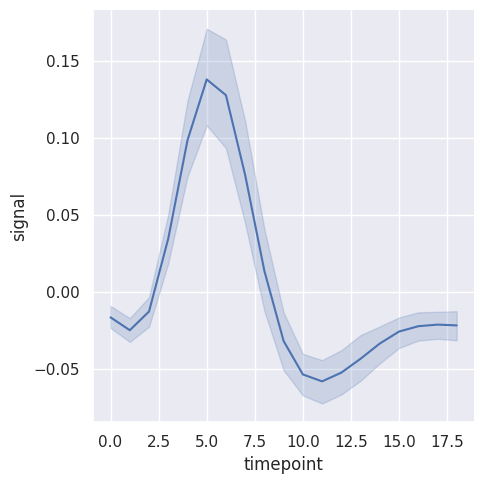

In [ ]:
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line") #с помощью kind рисуем именно линию, а не scatter
plt.show()

## Plotly

Теперь хотим интерактивности, да и вообще чего-то более мощного - то, чего не хватает двум прошлым библиотекам

Plotly - это основа из seaborn (то есть matplotlib в квадрате) + навешенный фронтенд на JS

Вместе с Flask существует отдельная библиотека Dash для создания красивых и приятных дашбордов

[Документация](https://plotly.com/python/)

In [8]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd

Начнем с базы - отрисовка самых простых графиков:

* line - линия

* scatter - точки

In [10]:
x = np.linspace(0, 1, num=100, endpoint=True)
y = np.sin(2 * x) + np.cos(9 * x)

px.scatter(x=x, y=y).show()

Ух ты, уже достаточно прикольно (видим значения, получаем интерактивность)

Давайте на базовом уровне проговорим о прорисовке внутри Plotly. Прорисовка состоит из создания словарика:

```
import plotly.io as pio

fig = dict({
    "data": [{"type": "bar",
              "x": [1, 2, 3],
              "y": [1, 3, 2]}],
    "layout": {"title": {"text": "A Figure Specified By Python Dictionary"}}
})

pio.show(fig)
```

По сути мы создаем большой вложенный словарь из инструкций, как и что прорисовывать. Понятное дело, что никто этим не хочет заниматься, поэтому для этого есть структура фигуры, внутри которой создается этот самый словарик

Чуть получше - создать фигуру, на которую будем все переносить (ну как в matplotlib)

И добавим сразу 2 линии!

In [11]:
fig = go.Figure() # Создали фигуру, внутри которой будем добавлять отрисовку
fig.add_trace(go.Scatter(x=x, y=y, name="$y = \sin 2x + \cos 9x$"))
fig.add_trace(go.Scatter(x=x, y=x, name="$y = x$"))
fig.show() #Хоба, стала линия, да еще и легенду сам добавил
# Но видим фигню при наведении, исправить можно, если писать в HTML-стиле все это, а не в LaTEX

<>:2: SyntaxWarning:

invalid escape sequence '\s'

<>:2: SyntaxWarning:

invalid escape sequence '\s'

/tmp/ipython-input-1830583635.py:2: SyntaxWarning:

invalid escape sequence '\s'



Не нравится, что легенда сбоку, хотим ее сдвинуть, давайте сдвинем!

Отдельная функция: [update_layout](https://plotly.com/python/reference/layout/). Аргументов и значений там примерно сотня, учить их все, мы, конечно же, не будем

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, name="y = sin 2x + cos 9x"))
fig.add_trace(go.Scatter(x=x, y=x*x, name="y = x<sup>2</sup>"))
fig.update_layout(legend_orientation="h",
                  margin=dict(l=0, r=0, t=0, b=0), #есть еще отступы, по дефолту 20 пикселей. Можем их убрать
                  legend=dict(x=.5, xanchor="center")) #а еще отцентрировать легенду
# l - left, r - right, t - top, b - bottom
fig.show()

Окей, по классике надо добавить подписи к осям и название. Тоже делаем через update_layout:

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, name="y = sin 2x + cos 9x"))
fig.add_trace(go.Scatter(x=x, y=x*x, name="y = x<sup>2</sup>"))
fig.update_layout(legend_orientation="h",
                  margin=dict(l=0, r=20, t=30, b=0), #надо сделать сдвиг вверху, чтобы название влезло. Сдвиг считается от самого графика
                  legend=dict(x=.5, xanchor="center"))
fig.update_layout(title="Functions",
                  xaxis_title="x",
                  yaxis_title="y")
fig.show()

Но все-таки хотим точки, а не линию. Решение есть - это mode внутри отрисовки!

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, name="y = sin 2x + cos 9x"))
fig.add_trace(go.Scatter(x=x, y=x*x, name="y = x<sup>2</sup>", mode='markers'))
fig.update_layout(legend_orientation="h",
                  margin=dict(l=0, r=20, t=30, b=0),
                  legend=dict(x=.5, xanchor="center"),
                  hovermode='x')
fig.update_layout(title="Functions",
                  xaxis_title="x",
                  yaxis_title="y")
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}") #Обновляем то, как показывать значения внутри
fig.show()

Не будем дальше останавливаться на возможности модификации самих линий и их отрисовок (это можно посмотреть [здесь](https://plotly.com/python/marker-style/))

Не будем останавливаться, просто потому что их невероятное количество внутри plotly. Просто приведу пример:

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, name="y = sin 2x + cos 9x", line=dict(color='Red', width=5)))
fig.add_trace(go.Scatter(x=x, y=x*x, name="y = x<sup>2</sup>", mode="markers", marker=dict(color='LightSkyBlue', size=6)))
# Можно задать отдельно для точек (с помощью marker - словарь, где указываем параметры)
# Отдельно для линий: line
fig.update_layout(legend_orientation="h",
                  margin=dict(l=0, r=20, t=30, b=0), #надо сделать сдвиг вверху, чтобы название влезло. Сдвиг считается от самого графика
                  legend=dict(x=.5, xanchor="center"))
fig.update_layout(title="Functions",
                  xaxis_title="x",
                  yaxis_title="y",
                  hovermode='x')
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Давайте попробуем создать несколько графиков:

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=["Plot 1", "Plot 2"]) # делается просто с помощью make_subplots

fig.add_trace(go.Scatter(x=x, y=y,  name='y = sin 2x + cos 9x'), 1, 1) #в конце указываем для add_trace куда добавляем (нумерация с 1)
fig.add_trace(go.Scatter(x=x, y=x * x,  name='y = x<sup>2</sup>'), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=50, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")

fig.update_layout(title="Plot Title", title_x=0.5)
fig.update_xaxes(title='Ось X графика 1', col=1, row=1) # отдельно как подписать оси в каждом случае
fig.update_xaxes(title='Ось X графика 2', col=2, row=1)
fig.update_yaxes(title='Ось Y графика 1', col=1, row=1)
fig.update_yaxes(title='Ось Y графика 2', col=2, row=1)

fig.show()

А теперь хотим создать три графика, где два будут в первой половине, а третий - во второй половине (как мы уже делали в matplotlib)

In [ ]:
fig = make_subplots(rows=2, cols=2, column_widths=[1, 2], # можно задать отношение колонок
                    specs=[
                        [{}, {"rowspan": 2}], #{} - занимай клетку, None - нет графика в клетке
                        [{}, None] # rowspan - объединяем несколько строк в одну, colspan - объединяем несколько колонок в одну
                    ]
)

# для объединения по колонкам используем colspan (идет все прямиком из HTML)

fig.add_trace(go.Scatter(x=x, y=y, name='y = sin 2x + cos 9x'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=x * x,  name='y = x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=y, name='y = sin 2x + cos 9x'), 2, 1)
fig.add_trace(go.Scatter(x=x, y=y, name='y = sin 2x + cos 9x'), 2, 2)

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0),
                  width=800, # Задаем размеры самой фигуры
                  height=1000)
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Давайте посмотрим на примеры еще базовых графиков (а более интересные вещи будут на семинаре, в том числе и анимация)

Для этого создадим датасет, состоящий из подбрасывания кубиков и будем его использовать:

In [ ]:
dices = pd.DataFrame(np.random.randint(low=1, high=7, size=(100, 2)), columns=('f', 's'))


dices['overall'] = dices.f + dices.s

sum_counts = dices.overall.value_counts().sort_index()
dices.head()

,f,s,overall
0,6,1,7
1,5,6,11
2,4,1,5
3,3,6,9
4,1,1,2


In [ ]:
sum_counts.head()

2     4
3     3
4     6
5    14
6     9
Name: overall, dtype: int64

In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(values=sum_counts, labels=sum_counts.index))
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(values=sum_counts, labels=sum_counts.index, sort = False))
fig.show()

In [ ]:
fig = go.Figure()
pull = [0]*len(sum_counts)
pull[sum_counts.tolist().index(sum_counts.max())] = 0.2
fig.add_trace(go.Pie(values=sum_counts, labels=sum_counts.index, pull=pull, hole=0.7))

fig.update_layout(
    annotations=[dict(text='Суммы очков<br>при броске<br>2 игральных костей', x=0.5, y=0.5, font_size=14, showarrow=False)])
fig.show()

In [ ]:
labels = ["Overall actions: " + str(sum(sum_counts))]
parents = [""]
values = [sum(sum_counts)]

second_level_dict = {x:'Actions: ' + str(sum_counts[x]) + '<br>Σ = ' + str(x) for x in sum_counts.index}
labels += map(lambda x: second_level_dict[x], sum_counts.index)
parents += [labels[0]]*len(sum_counts)
values += sum_counts.tolist()

third_level = dices.groupby(['f', 's']).count().reset_index()
third_level.rename(columns={'overall':'Value'}, inplace=True)
third_level['overall'] = third_level['f'] + third_level['s']
third_level['Label'] = third_level['f'].map(str) + ' + ' + third_level['s'].map(str)
third_level['Parent'] = third_level['overall'].map(lambda x: second_level_dict[x])
values += third_level['Value'].tolist()
parents += third_level['Parent'].tolist()
labels += third_level['Label'].tolist()

fig = go.Figure(go.Sunburst(
    labels = labels,
    parents = parents,
    values=values,
    branchvalues="total"
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [ ]:
print(labels)
print(parents)
print(values)

['Overall actions: 100', 'Actions: 3<br>Σ = 2', 'Actions: 11<br>Σ = 3', 'Actions: 3<br>Σ = 4', 'Actions: 12<br>Σ = 5', 'Actions: 8<br>Σ = 6', 'Actions: 14<br>Σ = 7', 'Actions: 12<br>Σ = 8', 'Actions: 19<br>Σ = 9', 'Actions: 6<br>Σ = 10', 'Actions: 8<br>Σ = 11', 'Actions: 4<br>Σ = 12', '1 + 1', '1 + 2', '1 + 4', '1 + 5', '1 + 6', '2 + 1', '2 + 2', '2 + 3', '2 + 5', '2 + 6', '3 + 2', '3 + 3', '3 + 4', '3 + 5', '3 + 6', '4 + 1', '4 + 3', '4 + 4', '4 + 5', '5 + 1', '5 + 2', '5 + 3', '5 + 4', '5 + 5', '5 + 6', '6 + 1', '6 + 2', '6 + 3', '6 + 4', '6 + 5', '6 + 6']
['', 'Overall actions: 100', 'Overall actions: 100', 'Overall actions: 100', 'Overall actions: 100', 'Overall actions: 100', 'Overall actions: 100', 'Overall actions: 100', 'Overall actions: 100', 'Overall actions: 100', 'Overall actions: 100', 'Overall actions: 100', 'Actions: 3<br>Σ = 2', 'Actions: 11<br>Σ = 3', 'Actions: 12<br>Σ = 5', 'Actions: 8<br>Σ = 6', 'Actions: 14<br>Σ = 7', 'Actions: 11<br>Σ = 3', 'Actions: 3<br>Σ = 4', '

Аналогично есть:

* Bar - столбчатая диаграмма

* Histogram - гистограмма

* Box - ящик с усами

* Violin - диаграмма виолончель

С ними поиграемся на семинаре)

In [ ]:
from scipy.stats import norm
r = norm.rvs(size=1000)

x_norm = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

fig = go.Figure()
fig.add_trace(go.Histogram(x=r, name='"Экспериментальные" данные'))
fig.update_layout(
    title="Пример гистограммы на основе нормального распределения",
    title_x = 0.5,
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(nbinsx=200, #добавим большое число бинов
                           x=r, histnorm='probability density', name='"Экспериментальные" данные'))
fig.add_trace(go.Scatter(x=x_norm, y=norm.pdf(x_norm), name='Теоретическая форма нормального распределения'))
fig.update_layout(
    title="Пример гистограммы на основе нормального распределения",
    title_x = 0.5,
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))

fig.show()

Давайте просто возьмем и развернем все это добро (делается абсолютно также, как и в случае с seaborn)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(nbinsx=200, #добавим большое число бинов
                           y=r, histnorm='probability density', name='"Экспериментальные" данные'))
fig.add_trace(go.Scatter(y=x_norm, x=norm.pdf(x_norm), name='Теоретическая форма нормального распределения'))
fig.update_layout(
    title="Пример гистограммы на основе нормального распределения",
    title_x = 0.5,
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))

fig.show()

И на самом деле даже больше - можно работать с картами!

In [13]:
cities = pd.read_csv('https://raw.githubusercontent.com/hflabs/city/master/city.csv')
cities.head()

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730


In [14]:
fig.update_layout(mapbox_style="open-street-map")

fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], lon=cities['geo_lon']))
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [ ]:
fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], lon=cities['geo_lon']))
capital = cities[cities['region']=='Москва']
map_center = go.layout.mapbox.Center(lat=capital['geo_lat'].values[0], lon=capital['geo_lon'].values[0])
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=5))
fig.show()

Чего-то не хватает, да? Наверное, как минимум, названий городов!

In [ ]:
fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], lon=cities['geo_lon'], text=cities['city']))
capital = cities[cities['region']=='Москва']
map_center = go.layout.mapbox.Center(lat=capital['geo_lat'].values[0], lon=capital['geo_lon'].values[0])
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=5))
fig.show()

И давайте в заключение просто нарисуем линию между Мск и Питером (потому что почему бы и нет)

In [ ]:
fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], lon=cities['geo_lon'], text=cities['city']))
capital = cities[cities['region']=='Москва']
map_center = go.layout.mapbox.Center(lat=capital['geo_lat'].values[0], lon=capital['geo_lon'].values[0])
fig.add_trace(go.Scattermapbox(mode = "lines",
                               hoverinfo='skip',
                               lat=cities[cities['region'].isin(['Санкт-Петербург', 'Москва'])]['geo_lat'],
                               lon=cities[cities['region'].isin(['Санкт-Петербург', 'Москва'])]['geo_lon']))
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=5))
fig.show()

## Dash

Говоря про веб-разработку нельзя забывать, что очень часто веб-страницы вам нужны для аналитики, чтобы показать всем красивые дашборды etc. Так как это очень частый запрос, то для этого есть отдельные библиотеки для визуализации. Сегодня разберем Dash

Что такое Dash? Напомним эволюцию развития визализаций:

* Matplotlib - база

* Seaborn - скомпоновали более красиво и просто

* Plotly - добавили красивую прорисовку и JS

* Dash - добавили в Plotly еще и Flask!

In [ ]:
!pip install dash
!pip install jupyter-dash

In [ ]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)

colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}


df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})


fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group") #опа, Plotly

fig.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash', style={'textAlign': 'center', 'color': '#7FDBFF'}),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True) #запускаем сервер

<IPython.core.display.Javascript object>

Что здесь видим?

Часть из Plotly, связанной с отрисовкой графиков

Часть из Flask, свзяанной с запуском приложения

Но есть еще одна часть - [html](https://dash.plotly.com/dash-html-components) и [dcc](https://dash.plotly.com/dash-core-components) (эта часть отвечает за то, чтобы сделать наш добрый HTML-документ)

В данном случае html - это часть, которая имеет все необходимые тэги

Внутри элементов HTML есть различные аргументы (которых достаточно много отдельных, тут лушче читать документацию), но основные, которые есть везде:

* children - что находится внутри (то есть отвечает за вложенность структуры)

* style - стиль (передаем как будто css-ка)

* id - параметр, нужный для callback

DCC - часть, которая необходима для отображения Plotly частей (будь то слайдер, график, выбор вариантов etc)

### Callback

Мы явно хотим иметь вские поля для воода, селекторы etc и их каким-то образом отрабатывать, что необходимо отдельно прописывать. Это делается с помощью callback (по существу, это функции, которые будут отрабаывать изменения через наши POST-запросы)

Давайте попробуем такой написать:

In [ ]:
from dash import Dash, dcc, html, Input, Output

## Часть с самим отрисовыванием

app = Dash(__name__)

app.layout = html.Div([
    html.H6("Change the value in the text box to see callbacks in action!"),
    html.Div([
        "Input: ",
        dcc.Input(id='my-input', value='initial value', type='text')
    ]),
    html.Br(),
    html.Div(id='my-output'),

])

## Наш Callback

@app.callback(
    Output(component_id='my-output', component_property='children'), ## Куда выводить
    Input(component_id='my-input', component_property='value') ## Откуда брать
)
def update_output_div(input_value):
    return f'Output: {input_value}' ## Мы вовзращаем некоторую строку, которая будет вставлена в компонент с id = my-output в children


if __name__ == '__main__':
    app.run_server(debug=True)

Но в данном случае все достаточно просто. Мы никаким образом не меняли ничего в данных etc. Давайте попробуем сделать все то же самое, но только уже с данными:

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')

app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        df['year'].min(),
        df['year'].max(),
        step=None,
        value=df['year'].min(),
        marks={str(year): str(year) for year in df['year'].unique()},
        id='year-slider'
    )
])


@app.callback(
    Output('graph-with-slider', 'figure'), # говорим, что меняем фигуру (то есть прорисовываем ее заново)
    Input('year-slider', 'value'))
def update_figure(selected_year):
    filtered_df = df[df.year == selected_year]

    fig = px.scatter(filtered_df, x="gdpPercap", y="lifeExp",
                     size="pop", color="continent", hover_name="country",
                     log_x=True, size_max=55)

    fig.update_layout(transition_duration=500)
    return fig


if __name__ == '__main__':
    app.run_server(debug=True)

Если у нас несколько селекторов, то надо прописывать несколько input на каждое значение. Логика простая:

* есть данные, нам их надо поменять

* забираем изменения через Input (аргументы идут в порядке вызова Input и меняем. Аналогично с Output - перечисляем и возвращаем в том же порядке, в котором давали Output)

Как можно понять, здесь уже можно спокойно делать несколько разных фильтров на один и тот же график)

### Callback от других графиков

А теперь допустим, что я хочу что-то выбрать на одном графике и чтобы остальные графики обновлялись при этом (допустим, тыкаем на точку, чтобы получить информацию на других графиках)

Тоже можно!

In [ ]:
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import plotly.express as px

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')


app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                'Fertility rate, total (births per woman)',
                id='crossfilter-xaxis-column',
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-xaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                'Life expectancy at birth, total (years)',
                id='crossfilter-yaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-yaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        df['Year'].min(),
        df['Year'].max(),
        step=None,
        id='crossfilter-year--slider',
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()}
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@app.callback(
    Output('crossfilter-indicator-scatter', 'figure'),
    Input('crossfilter-xaxis-column', 'value'),
    Input('crossfilter-yaxis-column', 'value'),
    Input('crossfilter-xaxis-type', 'value'),
    Input('crossfilter-yaxis-type', 'value'),
    Input('crossfilter-year--slider', 'value'))
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    fig = px.scatter(x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
            y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
            hover_name=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name']
            )

    fig.update_traces(customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'])

    fig.update_xaxes(title=xaxis_column_name, type='linear' if xaxis_type == 'Linear' else 'log')

    fig.update_yaxes(title=yaxis_column_name, type='linear' if yaxis_type == 'Linear' else 'log')

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    return fig


def create_time_series(dff, axis_type, title):

    fig = px.scatter(dff, x='Year', y='Value')

    fig.update_traces(mode='lines+markers')

    fig.update_xaxes(showgrid=False)

    fig.update_yaxes(type='linear' if axis_type == 'Linear' else 'log')

    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       text=title)

    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})

    return fig


@app.callback(
    Output('x-time-series', 'figure'),
    Input('crossfilter-indicator-scatter', 'hoverData'),
    Input('crossfilter-xaxis-column', 'value'),
    Input('crossfilter-xaxis-type', 'value'))
def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country Name'] == country_name]
    dff = dff[dff['Indicator Name'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@app.callback(
    Output('y-time-series', 'figure'),
    Input('crossfilter-indicator-scatter', 'hoverData'),
    Input('crossfilter-yaxis-column', 'value'),
    Input('crossfilter-yaxis-type', 'value'))
def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country Name'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Indicator Name'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)


if __name__ == '__main__':
    app.run_server(debug=True)

## Попугай дня

![Жако](https://petshop-vrn.ru/wp-content/uploads/6/c/a/6ca4dd99334ae553c70fbc4ed4165506.jpeg)

А это Жако, или серый попугай. Считаются самыми умными попугаями в мире, потому что они способны не просто на подражание звуков (как это делают многие попугаи)

В 1980-х годах ученая Ирэн Пепперберг проводила исследования по языковому мышлению различных животных, и одним из подопытных был серый попугай по имени Алекс. По результатам эксперимента Алекс мог произносить очень много слов, причем он верно отвечал на вопросы и в целом коммуницировал исходя не из подражания, а из логики. В целом было показано, что у него было мышление, как у шестилетнего ребенка, что стало полным открытием для ученых.

Хотя, на самом деле, сравнивать мышление попугаев и людей сложно, потому что мышление животных и не должно быть похожим на человеческое